In [2]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res.group(0)[0:2]
    return 'na'
def pandas_smape(df):
    df.fillna(0, inplace=True)
    df["SMAPE"] = 200 * np.abs(df["Visits"] - df["pred_Visits"]) / (df["Visits"] + df["pred_Visits"])
    df["SMAPE"].fillna(0, inplace=True)
    return np.mean(df["SMAPE"])

In [3]:
train = pd.read_csv("wikipedia_train.csv")
test = pd.read_csv("wikipedia_test.csv")
train.columns = ['Page'] + list(pd.to_datetime(train.columns[1:]))
test.columns = ['Page'] + list(pd.to_datetime(test.columns[1:]))

### First look

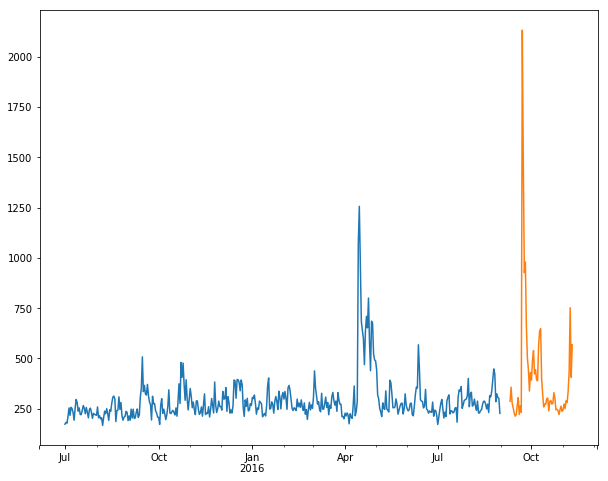

,Page,2015-07-01 00:00:00,2015-07-02 00:00:00,2015-07-03 00:00:00,2015-07-04 00:00:00,2015-07-05 00:00:00,2015-07-06 00:00:00,2015-07-07 00:00:00,2015-07-08 00:00:00,2015-07-09 00:00:00,...,2016-08-22 00:00:00,2016-08-23 00:00:00,2016-08-24 00:00:00,2016-08-25 00:00:00,2016-08-26 00:00:00,2016-08-27 00:00:00,2016-08-28 00:00:00,2016-08-29 00:00:00,2016-08-30 00:00:00,2016-08-31 00:00:00
692,Нани_ru.wikipedia.org_desktop_all-agents,219.0,320.0,582.0,344.0,418.0,1070.0,463.0,260.0,289.0,...,220.0,168.0,125.0,154.0,219.0,172.0,168.0,175.0,201.0,176.0
296,Hugh_Grant_en.wikipedia.org_all-access_all-agents,3199.0,3057.0,4307.0,9599.0,4601.0,3589.0,3124.0,3330.0,3749.0,...,6971.0,7354.0,5439.0,5656.0,5842.0,7507.0,8607.0,6275.0,5237.0,5402.0
26,Amy_Adams_en.wikipedia.org_all-access_all-agents,6094.0,5972.0,6083.0,6118.0,14142.0,6759.0,6056.0,6041.0,6091.0,...,8703.0,7458.0,7950.0,8712.0,7481.0,7313.0,8661.0,7723.0,5956.0,5144.0
393,Manual:Robots.txt_www.mediawiki.org_mobile-web...,0.0,3.0,0.0,3.0,2.0,6.0,1.0,2.0,5.0,...,8.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
203,File:Debbie_Does_Dallas.ogg_commons.wikimedia....,0.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,...,12.0,5.0,4.0,1.0,6.0,3.0,7.0,4.0,10.0,4.0


In [10]:
dataPlot = train.sample().index[0]
train.iloc[dataPlot][1:].plot()
test.iloc[dataPlot][1:].plot()
plt.show()
train.sample(5)

### Task 1 , 2

In [11]:
ruTrain = train.iloc[[ get_language(page)=='ru' for page in train['Page']] ]
print("ru wiki size: " + str(ruTrain['Page'].size))
print("ru wiki max Visits: "+ train.iloc[ruTrain.mean(axis = 1, numeric_only = True).idxmax() , 0 ] )
ruTrain.sample(5)

ru wiki size: 102
ru wiki max Visits: Facebook_ru.wikipedia.org_desktop_all-agents


,Page,2015-07-01 00:00:00,2015-07-02 00:00:00,2015-07-03 00:00:00,2015-07-04 00:00:00,2015-07-05 00:00:00,2015-07-06 00:00:00,2015-07-07 00:00:00,2015-07-08 00:00:00,2015-07-09 00:00:00,...,2016-08-22 00:00:00,2016-08-23 00:00:00,2016-08-24 00:00:00,2016-08-25 00:00:00,2016-08-26 00:00:00,2016-08-27 00:00:00,2016-08-28 00:00:00,2016-08-29 00:00:00,2016-08-30 00:00:00,2016-08-31 00:00:00
716,Сон_ru.wikipedia.org_mobile-web_all-agents,354.0,355.0,307.0,378.0,403.0,415.0,411.0,386.0,352.0,...,536.0,495.0,529.0,474.0,523.0,467.0,557.0,514.0,525.0,516.0
681,"Литвинова,_Рената_Муратовна_ru.wikipedia.org_m...",207.0,247.0,277.0,399.0,454.0,517.0,391.0,341.0,278.0,...,294.0,262.0,246.0,262.0,943.0,769.0,941.0,409.0,372.0,261.0
729,"Шевченко,_Валентина_Анатольевна_ru.wikipedia.o...",1.0,0.0,1.0,1.0,4.0,NaN,3.0,3.0,0.0,...,106.0,85.0,66.0,84.0,87.0,79.0,102.0,73.0,78.0,63.0
677,"Ковальчук,_Илья_Валерьевич_ru.wikipedia.org_al...",31.0,34.0,29.0,33.0,21.0,24.0,21.0,9.0,23.0,...,13.0,12.0,11.0,13.0,9.0,6.0,6.0,8.0,11.0,7.0
692,Нани_ru.wikipedia.org_desktop_all-agents,219.0,320.0,582.0,344.0,418.0,1070.0,463.0,260.0,289.0,...,220.0,168.0,125.0,154.0,219.0,172.0,168.0,175.0,201.0,176.0


### Task 3 : Last day baseline

Нужно сделать прогноз на основе посещений в последний известный нам день из train (продублировать значение для каждого дня в test)

In [12]:
prediction = pd.melt(test , id_vars = ['Page']  , var_name='date', value_name='Visits')
vector = []
for i in range(test.columns.size-1):
    vector += list(train[train.columns[-1]])
prediction['pred_Visits'] = vector
print(pandas_smape(prediction))
prediction.sample(5)

54.16127748085736


,Page,date,Visits,pred_Visits,SMAPE
44820,"Металлург_(хоккейный_клуб,_Магнитогорск)_ru.wi...",2016-10-27,64.0,97.0,40.993789
48708,宏盛帝寶_zh.wikipedia.org_desktop_all-agents,2016-10-31,64.0,50.0,24.561404
13190,Attentats_du_13_novembre_2015_en_France_fr.wik...,2016-09-24,48.0,15.0,104.761905
10048,"Демидова,_Алла_Сергеевна_ru.wikipedia.org_mobi...",2016-09-20,498.0,56.0,159.566787
17843,2016_FIFA_U-20女子ワールドカップ_ja.wikipedia.org_all-a...,2016-09-29,2.0,4.0,66.666667


### Task 4 : Median 30 baseline

In [13]:
mediana = train.iloc[:,-30:].median(axis = 1, numeric_only = True)
    
prediction = pd.melt(test , id_vars = ['Page']  , var_name='date', value_name='Visits')
vector = []
for i in range(test.columns.size-1):
    vector += list(mediana)
prediction['pred_Visits'] = vector
print(pandas_smape(prediction))
prediction.head()

52.46588329336902


,Page,date,Visits,pred_Visits,SMAPE
0,15._November_de.wikipedia.org_desktop_all-agents,2016-09-10,43.0,24.0,56.716418
1,2012_(film)_fr.wikipedia.org_all-access_spider,2016-09-10,6.0,5.0,18.181818
2,2016_FIFA_U-20女子ワールドカップ_ja.wikipedia.org_all-a...,2016-09-10,4.0,2.5,46.153846
3,2016_UEFA_Europa_League_Final_en.wikipedia.org...,2016-09-10,15.0,15.5,3.278689
4,2016_in_video_gaming_en.wikipedia.org_all-acce...,2016-09-10,101.0,110.5,8.983452


### Task 5 : My Median baseline

In [16]:
bestMedianAmount =3

47.84908590843779
49


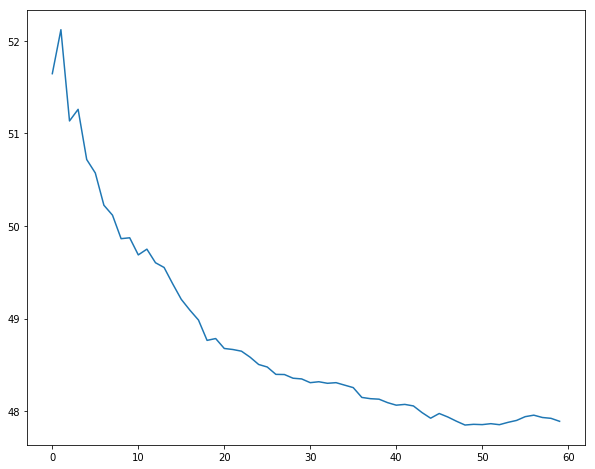

In [22]:
dayMass = [train.columns[ [False] + [ column.dayofweek == N for column in train.columns[1:]]] for N in range(7)]
bestPred = []
medianaBest = train.iloc[:,-bestMedianAmount:].median(axis = 1, numeric_only = True)
tmpPred = pd.melt(test , id_vars = ['Page']  , var_name='date', value_name='Visits')
for j in range(1,61):
    dayOfWeekMedian = [train[dayMass[i]].iloc[:,-j:].median(axis = 1, numeric_only = True) for i in range(7)]
    pred = tmpPred.copy()
    pred['pred_Visits'] = [(dayOfWeekMedian[pred.loc[i, 'date'].dayofweek][ np.mod(i , test.index.size)] + medianaBest[np.mod(i , test.index.size)] )/2 for i in range(pred.index.size)]
    bestPred.append(pandas_smape(pred))
pd.Series(bestPred).plot()
bestarg = pd.Series(bestPred).idxmin()+1
print(pd.Series(bestPred).min())
print(bestarg)
plt.show()

dayOfWeekMedian = [train[dayMass[i]].iloc[:,-bestarg:].median(axis = 1, numeric_only = True) for i in range(7)]
pred_7_1 = tmpPred.copy()
pred_7_1['pred_Visits'] = [(dayOfWeekMedian[pred.loc[i, 'date'].dayofweek][ np.mod(i , test.index.size)] + medianaBest[np.mod(i , test.index.size)] )/2 for i in range(pred.index.size)]

In [20]:
bestarg

49

47.84908590843779
3


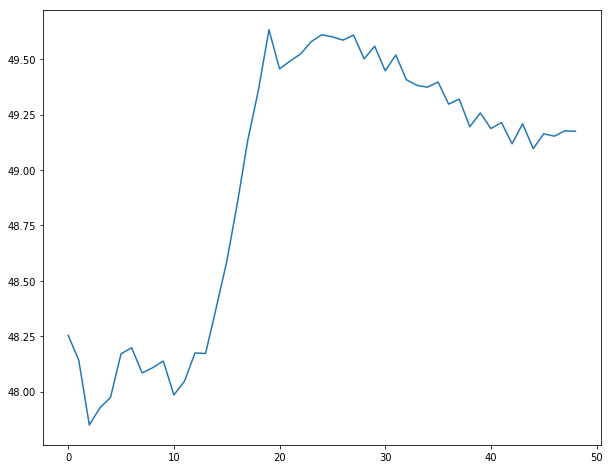

In [26]:
dayMass = [train.columns[ [False] + [ column.dayofweek == N for column in train.columns[1:]]] for N in range(7)]
dayOfWeekMedian = [train[dayMass[i]].iloc[:,-bestarg:].median(axis = 1, numeric_only = True) for i in range(7)]
bestPred = []
#medianaBest = train.iloc[:,-11:].median(axis = 1, numeric_only = True)
tmpPred = pd.melt(test , id_vars = ['Page']  , var_name='date', value_name='Visits')
for j in range(1,50):
    medianaTMP = train.iloc[:,-j:].median(axis = 1, numeric_only = True)
    pred = tmpPred.copy()
    pred['pred_Visits'] = [(dayOfWeekMedian[pred.loc[i, 'date'].dayofweek][ np.mod(i , test.index.size)] + medianaTMP[np.mod(i , test.index.size)] )/2 for i in range(pred.index.size)]
    bestPred.append(pandas_smape(pred))
pd.Series(bestPred).plot()
bestMedianAmount = pd.Series(bestPred).idxmin()+1
print(pd.Series(bestPred).min())
print(bestMedianAmount)
plt.show()

#dayOfWeekMedian = [train[dayMass[i]].iloc[:,-bestarg:].median(axis = 1, numeric_only = True) for i in range(7)]
medianaBest = train.iloc[:,-bestMedianAmount:].median(axis = 1, numeric_only = True)
pred_7_1 = tmpPred.copy()
pred_7_1['pred_Visits'] = [(dayOfWeekMedian[pred.loc[i, 'date'].dayofweek][ np.mod(i , test.index.size)] + medianaBest[np.mod(i , test.index.size)] )/2 for i in range(pred.index.size)]

### Comparison

File:Artist’s_impression_of_eclipsing_binary.ogg_commons.wikimedia.org_desktop_all-agents


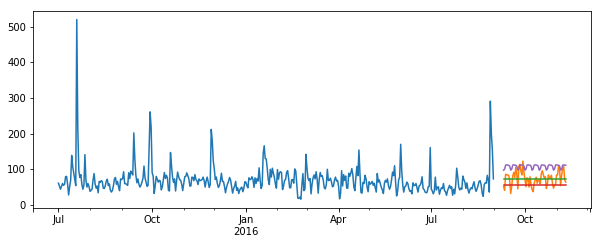

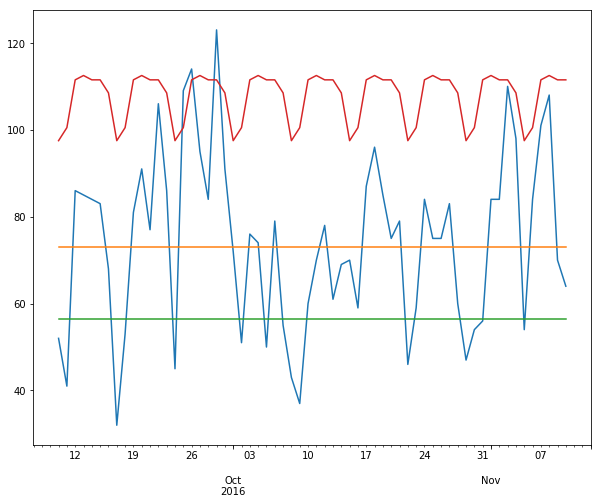

Das_Adlon._Eine_Familiensaga_de.wikipedia.org_mobile-web_all-agents


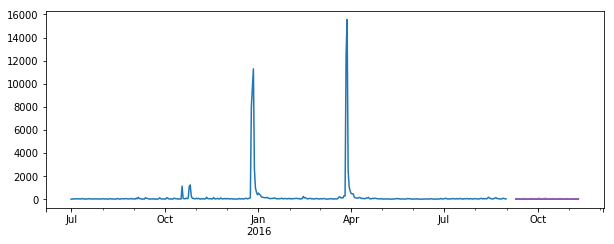

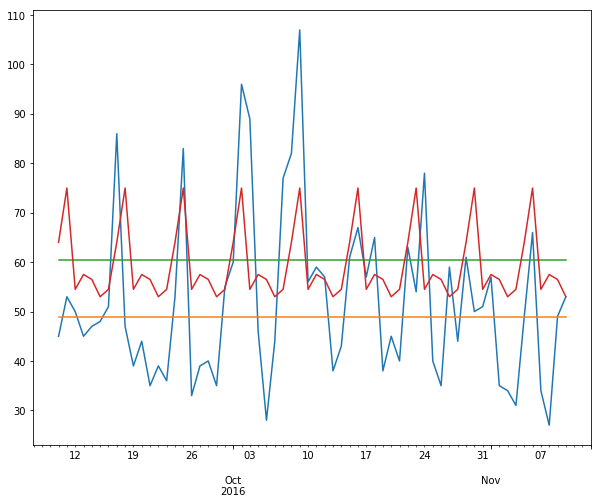

Iglesia_católica_es.wikipedia.org_mobile-web_all-agents


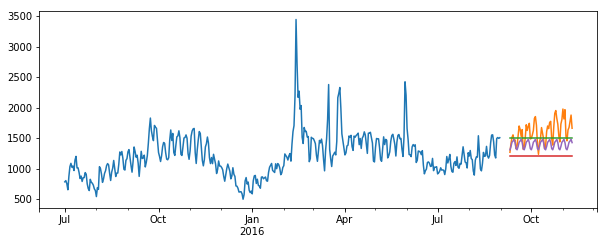

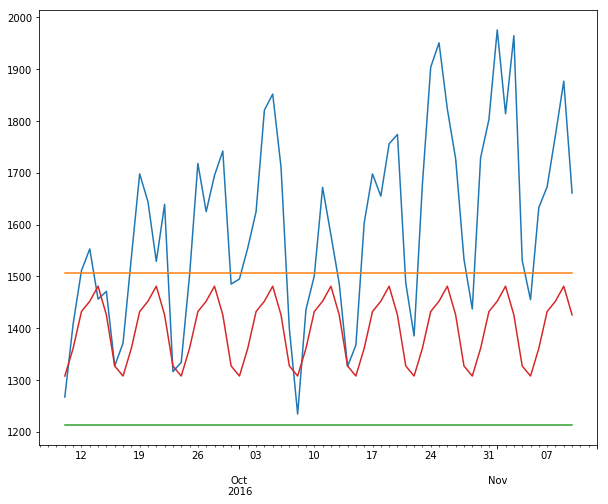

ホタル_ja.wikipedia.org_mobile-web_all-agents


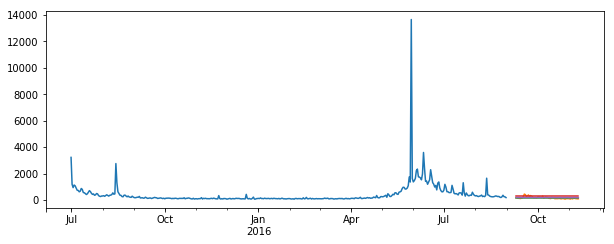

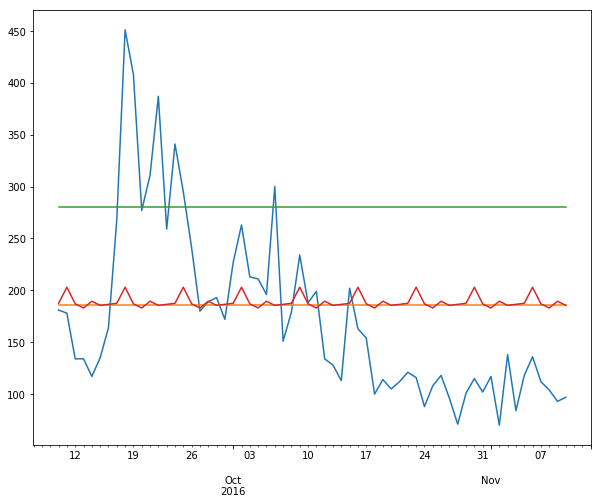

Frankreich_de.wikipedia.org_desktop_all-agents


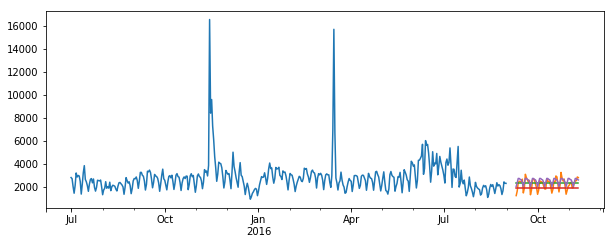

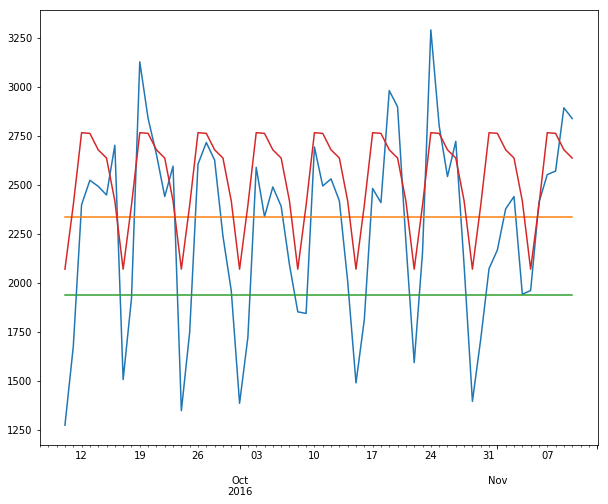

Million_Dollar_Baby_fr.wikipedia.org_mobile-web_all-agents


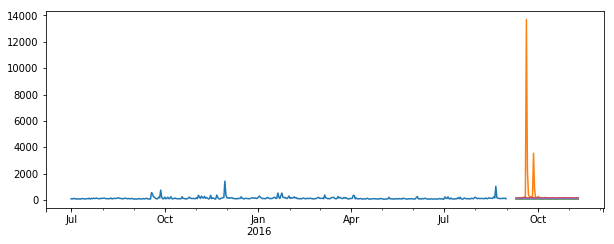

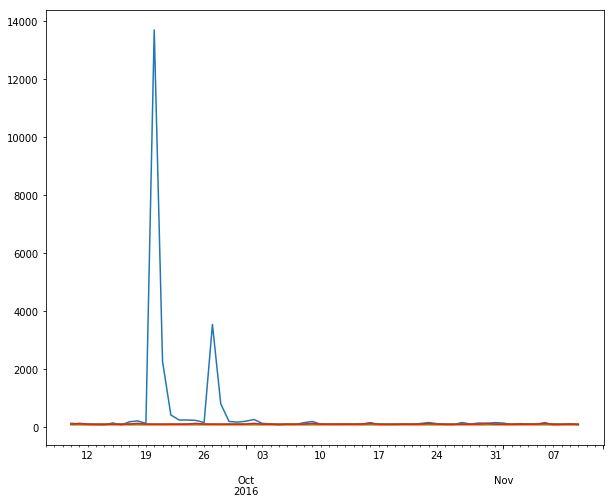

康熙帝_zh.wikipedia.org_all-access_all-agents


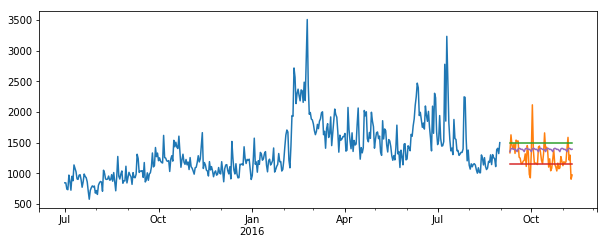

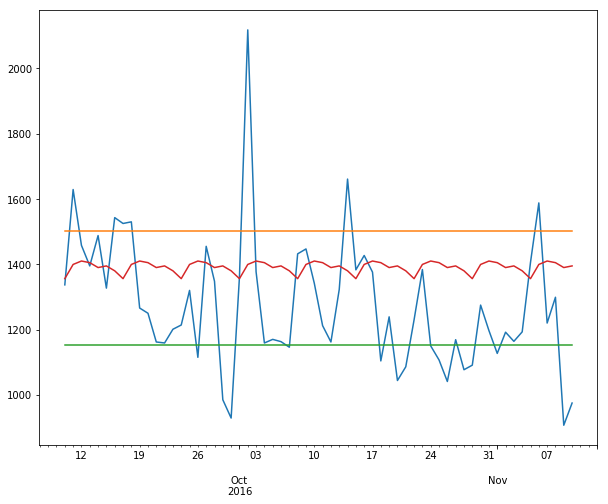

Монсон,_Джефф_ru.wikipedia.org_desktop_all-agents


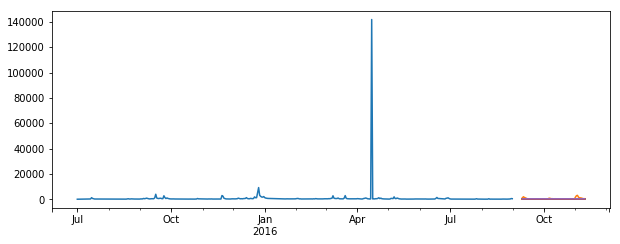

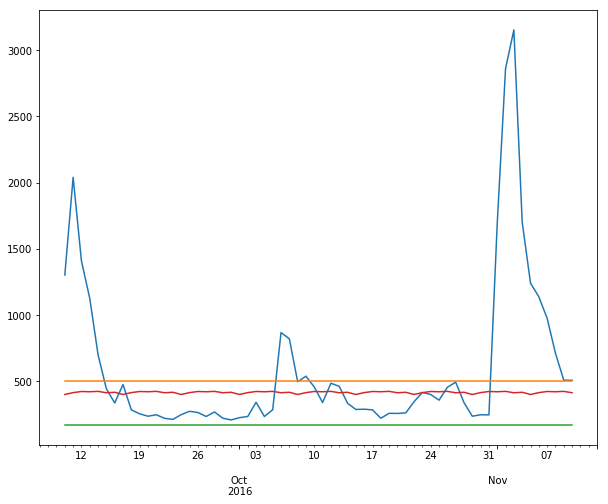

Special:UserLogout_www.mediawiki.org_mobile-web_all-agents


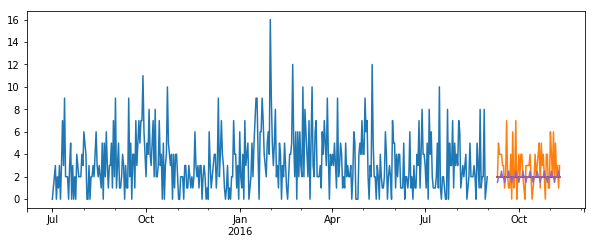

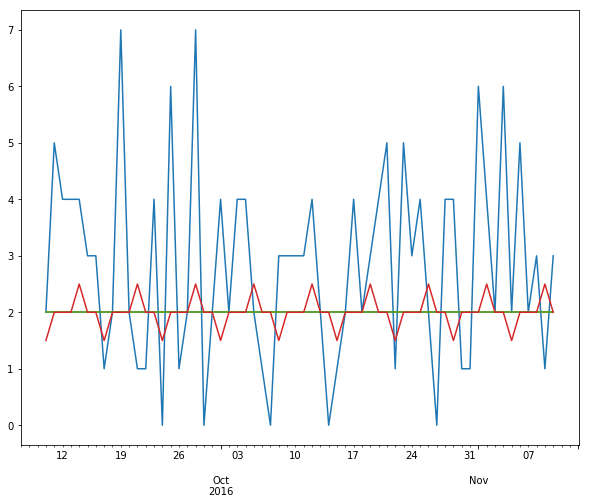

丸高愛実_ja.wikipedia.org_all-access_all-agents


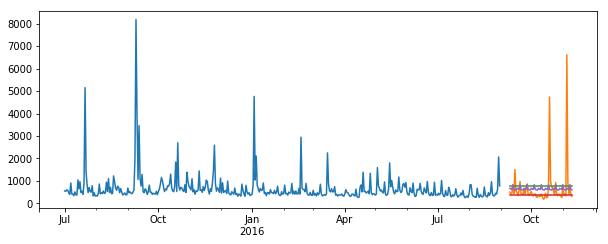

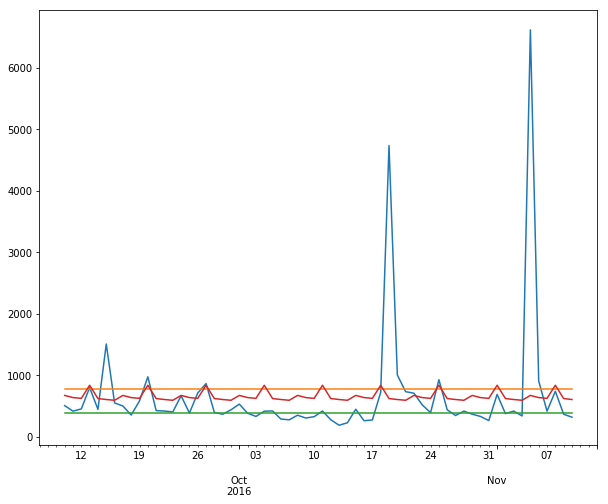

In [24]:
for i in range(10):
    plotIndex = test.iloc[: , 1:].sample().index[0]
    print(train.iloc[plotIndex , 0])
    plt.subplot(2, 1, 1)
    train.iloc[plotIndex , 1:].plot()
    test.iloc[plotIndex , 1:].plot()
    pd.Series([train.iloc[plotIndex , -1] for i in range(test.columns[1:].size)] , index = test.columns[1:] ).plot()
    pd.Series([mediana[plotIndex] for i in range(test.columns[1:].size)] , index = test.columns[1:] ).plot()
    #pd.Series([pred_5_2.iloc[plotIndex + i*test.index.size , 3] for i in range(test.columns[1:].size)] , index = test.columns[1:] ).plot()
    pd.Series([pred_7_1.iloc[plotIndex + i*test.index.size , 3] for i in range(test.columns[1:].size)] , index = test.columns[1:] ).plot()
    plt.show()
    test.iloc[plotIndex , 1:].plot()
    pd.Series([train.iloc[plotIndex , -1] for i in range(test.columns[1:].size)] , index = test.columns[1:] ).plot()
    pd.Series([mediana[plotIndex] for i in range(test.columns[1:].size)] , index = test.columns[1:] ).plot()
    #pd.Series([pred_5_2.iloc[plotIndex + i*test.index.size , 3] for i in range(test.columns[1:].size)] , index = test.columns[1:] ).plot()
    pd.Series([pred_7_1.iloc[plotIndex + i*test.index.size , 3] for i in range(test.columns[1:].size)] , index = test.columns[1:] ).plot()
    plt.show()

#### The End